# Using unlabelled, unfractionated datasets obtained from QExact and VOrbi instruments
* Datasets were searched against H_sapiens_Uniprot_SPROT_2017-04-12, Tryp_Pig_Bov sequence files using MSGFPlus
* Combined results with MASIC results (Q <= 0.01) to get quantitation data

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import Classification_Utils as cu
import MaxQuant_Postprocessing_Functions as mq
import numpy as np
from os import listdir
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn import preprocessing
import time

## Load (and combine?) data from all tissues

In [3]:
HIGH_QUAL_DIR = 'F:\High_Quality\\'
TEST_SET_DIR = 'F:\Test_Set\\'

files_dir = HIGH_QUAL_DIR 
file_paths = listdir(files_dir) 

#files_dir2 = TEST_SET_DIR
#file_paths2 = listdir(files_dir2) 

df = cu.combine_csvs(files_dir, file_paths)

#df1 = cu.combine_csvs(files_dir, file_paths)
#df2 = cu.combine_csvs(files_dir2, file_paths2)
#df = df1.join(df2, how='outer')

In [4]:
df.dropna(axis='index', how='all', inplace=True) # drop any rows where all values are missing
df = df.drop(['\n'])

original_df = df.copy()

print(df.shape)

(139784, 169)


## Clean data
* Log2 transform
* Impute missing values
* Mean/Median normalize

In [5]:
mq.log2_normalize(df)

df_min = df.min().min()
impute_val = df_min/2
df = df.fillna(impute_val)

# median normalize
mq.median_normalize(df)
#df.iloc[:,:] = preprocessing.RobustScaler().fit_transform(df)

C:\Users\kush494\Documents\Proteomics_Data_Processing\MaxQuant_Postprocessing_Functions.py:150: RuntimeWarning: divide by zero encountered in log2
  df.iloc[:,:] = np.log2(df.iloc[:,:])


## Map each column to a corresponding label

In [6]:
tissues = ['Blood_Plasma', 'Blood_Serum', 'CSF', 'Liver', 'Monocyte', 'Ovary', 'Pancreas', 'Substantia_Nigra', 'Temporal_Lobe']
 
tissues_to_columns = cu.map_tissues_to_columns(df, tissues)

In [7]:
column_names = df.columns.values.tolist()
labels = cu.get_labels(column_names, tissues_to_columns)

In [8]:
df.head()

,Blood_Plasma_CPTAC_TrypDige_undepleted_normal_19Apr13_Methow_13-02-13,Blood_Plasma_Darpa_2_human_02_23Jan17_Arwem_16-10-25,Blood_Plasma_OMICS_EBV_HP_UW001_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW002_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW003_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW004_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW005_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW006_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW007_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW008_8Apr16_Arwen_16-01-03,...,Temporal_Lobe_Alz_FX2P57_IMAC_163_26Apr11_Hawk_10-12-03p,Temporal_Lobe_Alz_FX2P57_IMAC_171_11May11_Hawk_11-04-02p,Temporal_Lobe_Alz_FX2P57_IMAC_175_20Apr11_Hawk_10-12-03p,Temporal_Lobe_Alz_FX2P57_IMAC_179_23May11_Hawk_11-04-02p,Temporal_Lobe_Alz_FX2P57_IMAC_184_20Apr11_Hawk_10-12-03p,Temporal_Lobe_Alz_FX2P57_IMAC_187_7May11_Hawk_11-04-02p,Temporal_Lobe_Alz_FX2P57_IMAC_189_11May11_Hawk_11-04-02p,Temporal_Lobe_Alz_FX2P57_IMAC_190_11May11_Hawk_11-04-02p,Temporal_Lobe_Alz_FX2P57_IMAC_195_20Apr11_Hawk_10-12-03p,Temporal_Lobe_Alz_FX2P57_IMAC_200_22Apr11_Hawk_10-12-03p
Peptide,,,,,,,,,,,,,,,,,,,,,
\n-.ASTKGPSVFPLAPSSK.S,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,...,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208
\n-.DIQM*TQSPSTLSASVGDR.V,26.731951,22.187643,3.022208,29.328345,29.916272,3.022208,27.586706,30.458361,29.004130,31.023004,...,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208
\n-.DIQM*TQSPSTLSASVGDRVTITCR.A,3.022208,3.022208,3.022208,30.633308,30.815586,3.022208,29.483431,32.564995,30.319263,32.368436,...,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208
\n-.DIQMTQSPS.T,26.764332,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,...,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208
\n-.DIQMTQSPSTLSASVGDR.V,26.387537,28.015792,3.022208,3.022208,31.403752,3.022208,27.695976,29.779972,29.747784,30.255299,...,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208


In [9]:
df.columns.values.tolist()

['Blood_Plasma_CPTAC_TrypDige_undepleted_normal_19Apr13_Methow_13-02-13',
 'Blood_Plasma_Darpa_2_human_02_23Jan17_Arwem_16-10-25',
 'Blood_Plasma_OMICS_EBV_HP_UW001_8Apr16_Arwen_16-01-03',
 'Blood_Plasma_OMICS_EBV_HP_UW002_8Apr16_Arwen_16-01-03',
 'Blood_Plasma_OMICS_EBV_HP_UW003_8Apr16_Arwen_16-01-03',
 'Blood_Plasma_OMICS_EBV_HP_UW004_8Apr16_Arwen_16-01-03',
 'Blood_Plasma_OMICS_EBV_HP_UW005_8Apr16_Arwen_16-01-03',
 'Blood_Plasma_OMICS_EBV_HP_UW006_8Apr16_Arwen_16-01-03',
 'Blood_Plasma_OMICS_EBV_HP_UW007_8Apr16_Arwen_16-01-03',
 'Blood_Plasma_OMICS_EBV_HP_UW008_8Apr16_Arwen_16-01-03',
 'Blood_Plasma_OMICS_EBV_HP_UW009_8Apr16_Arwen_16-01-03',
 'Blood_Plasma_OMICS_EBV_HP_UW010_8Apr16_Arwen_16-01-03',
 'Blood_Plasma_OMICS_EBV_HP_UW011_8Apr16_Arwen_16-01-03',
 'Blood_Plasma_OMICS_EBV_HP_UW012_8Apr16_Arwen_16-01-03',
 'Blood_Plasma_OMICS_EBV_HP_UW013_19Apr16_Arwen_16-01-03',
 'Blood_Plasma_OMICS_EBV_HP_UW014_8Apr16_Arwen_16-01-03',
 'Blood_Plasma_OMICS_EBV_HP_UW015_8Apr16_Arwen_16-01-03'

### Optional step to transform data

In [10]:
### Function to wrap whatever additional transformation is done to the train set, so that it can later be applied to the test set
def reduce_features(df):
    df = cu.keep_percentile_features(df, labels, 100)
    return df
    

In [11]:
df = reduce_features(df)
features_to_keep = df.index.values.tolist()

print(df.shape)

(34946, 169)


### For testing purposes: threshold data

In [30]:
import math

df_t = df.T
num_rows = df_t.shape[1]

one_protein_df = df_t.drop(df_t.columns[list(range(num_rows-1))], axis=1)
fifteen_protein_df = df_t.drop(df_t.columns[list(range(num_rows-15))], axis=1)
sixteenthpercent_df = df_t.drop(df_t.columns[list(range(math.floor(num_rows*(1599/1600))))], axis=1)
eighthpercent_df = df_t.drop(df_t.columns[list(range(math.floor(num_rows*(799/800))))], axis=1)
quarterpercent_df = df_t.drop(df_t.columns[list(range(math.floor(num_rows*(399/400))))], axis=1)
halfpercent_df = df_t.drop(df_t.columns[list(range(math.floor(num_rows*(199/200))))], axis=1)
one_percent_df = df_t.drop(df_t.columns[list(range(math.floor(num_rows*(99/100))))], axis=1)
twentieth_df = df_t.drop(df_t.columns[list(range(math.floor(num_rows*(95/100))))], axis=1)
tenth_df = df_t.drop(df_t.columns[list(range(math.floor(num_rows*(9/10))))], axis=1)
quarter_df = df_t.drop(df_t.columns[list(range(math.floor(num_rows*(3/4))))], axis=1)
half_df = df_t.drop(df_t.columns[list(range(num_rows//2))], axis=1)
three_quarters_df = df_t.drop(df_t.columns[list(range(num_rows//4))], axis=1)
nine_tenths_df = df_t.drop(df_t.columns[list(range(num_rows//10))], axis=1)

In [31]:
thresholded_df = one_protein_df
thresholded_df.shape

(169, 1)

## Visualize data
* Normalized boxplots
* Scree plot
* PCA plot
* Pearson Matrix

In [465]:
image_dir = r'D:\Images\Human_Tissues\\'

column_to_color = mq.map_colors(tissues, tissues_to_columns, 9)

In [33]:
mq.make_seaborn_boxplot(df, image_dir, 'Median_normalized_boxplots', column_to_color)

In [466]:
#scaled_data = preprocessing.scale(df.T)
scaled_data = df.T

pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for dataframe

pca_3 = PCA(n_components=3) 
pca_3.fit(scaled_data)
pca_data_3 = pca_3.transform(scaled_data)

per_var, pca_labels = mq.make_scree_plot(pca, image_dir, 'Scree Plot - 25 Percentile')
per_var_3, pca_labels_3 = mq.make_scree_plot(pca_3, image_dir, '3 Dimensional Scree - 25 Percentile')

mq.draw_pca_graph2(column_names, pca_data, image_dir, column_to_color, per_var, pca_labels, tissues, tissues_to_columns, 'PCA - 25 Percentile')
#mq.draw_pca_graph(column_names, pca_data, image_dir, column_to_color, per_var, pca_labels, 'PCA_RobustScaler_Annotated')

mq.draw_3d_pca(column_names, pca_data_3, image_dir, column_to_color, per_var_3, pca_labels_3, tissues, tissues_to_columns, '3D PCA - 25 Percentile')

C:\Users\kush494\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [ ]:
mq.make_pearson_matrix(df, image_dir)

## Test various classifiers using cross-validation

In [12]:
NUM_SPLITS = 100
transformed_df = df.T

### Decision Tree

In [13]:
dt = cu.decisiontree_model_crossval(transformed_df, labels, NUM_SPLITS)

accuracy: 0.89 (+/- 0.12)


### KNN

In [14]:
knn = cu.knn_model_crossval(transformed_df, labels, NUM_SPLITS)

accuracy: 0.90 (+/- 0.08)


### Logistic Regression

In [15]:
lr = cu.logistic_regression_model_crossval(transformed_df, labels, NUM_SPLITS)

accuracy: 0.99 (+/- 0.02)


### Naive Bayes
* Gaussian
* Multinomial

In [16]:
gnb = cu.bayes_gaussian_model_crossval(transformed_df, labels, NUM_SPLITS)

accuracy: 0.93 (+/- 0.05)


In [17]:
mnb = cu.bayes_multinomial_model_crossval(transformed_df, labels, NUM_SPLITS)

accuracy: 0.91 (+/- 0.06)


### SVC variations

In [18]:
svc_models = cu.SVC_models_crossval(transformed_df, labels, NUM_SPLITS)

accuracy: 0.98 (+/- 0.04)
accuracy: 0.94 (+/- 0.11)
accuracy: 0.13 (+/- 0.02)
accuracy: 0.92 (+/- 0.07)


### Aggregations
* Random Forest
* Gradient Boosting

In [ ]:
rf = cu.randomforest_model_crossval(transformed_df, labels, NUM_SPLITS)

accuracy: 0.97 (+/- 0.05)


In [ ]:
gbc = cu.gradient_boosting_crossval(transformed_df, labels, NUM_SPLITS)

## Tune parameters of best models 
* Check accuracy score

In [ ]:
GRID_SEARCH_FOLDS = 10
N_JOBS = 1
start_time = time.time()

### Gradient Boosting grid search

In [ ]:
gbc_grid = cu.gbc_grid_search(GRID_SEARCH_FOLDS, N_JOBS)

gbc_grid.fit(transformed_df, labels)

print('Best Gradient Boosting parameters:\n', gbc_grid.best_params_)
print('\nBest Cross-Validation score:\n', gbc_grid.best_score_)

print("--- %s minutes ---" % ((time.time() - start_time)/60))

###  Logistic Regression grid search

In [ ]:
lr_grid = cu.lr_grid_search(GRID_SEARCH_FOLDS, N_JOBS)

lr_grid.fit(transformed_df, labels)

print('Best Logistic Regression parameters:\n', lr_grid.best_params_)
print('\nBest Cross-Validation score:\n', lr_grid.best_score_)

print("--- %s minutes ---" % ((time.time() - start_time)/60))

### Random Forest grid search

In [ ]:
rf_grid = cu.rf_grid_search(GRID_SEARCH_FOLDS, N_JOBS)

rf_grid.fit(transformed_df, labels)

print('Best Random Forest parameters:\n', rf_grid.best_params_)
print('\nBest Cross-Validation score:\n', rf_grid.best_score_)

print("--- %s minutes ---" % ((time.time() - start_time)/60))

### SVC grid search

In [ ]:
svc_grid = cu.svc_grid_search(GRID_SEARCH_FOLDS, N_JOBS)

svc_grid.fit(transformed_df, labels)

print('Best SVC parameters:\n', svc_grid.best_params_)
print('\nBest Cross-Validation score:\n', svc_grid.best_score_)

print("--- %s minutes ---" % ((time.time() - start_time)/60))

## Top expressed peptides per tissue

In [ ]:
cu.print_top_n_features(df, rf, 10)
cu.print_top_n_features_coef(df, lr, 10, tissues)

## Save model, test new data
* Save array/dataframe of features (via joblib) along with final model
* Write script to classify new data-- load features and fit new data on them

### Serialize models, training data, and training features

In [ ]:
finalized_model_folder = r'Trained_Models\\'
model_path = finalized_model_folder + 'svc_grid_25Percentile.sav'
joblib.dump(svc_grid, open(model_path, 'wb'))

In [57]:
train_data_path = finalized_model_folder + 'train_data'
joblib.dump(original_df, open(train_data_path, 'wb'))

In [58]:
train_features_path = finalized_model_folder + 'train_features'
joblib.dump(features_to_keep, open(train_features_path, 'wb'))

### Load new data (test set)

In [60]:
test_paths = listdir(TEST_SET_DIR) 

test_data = cu.combine_csvs(TEST_SET_DIR, test_paths)

### Generate test_labels. Columns in test set must start with [Tissue Name]
test_labels = []
for col in test_data.columns.values.tolist():
    for tissue in tissues:
        if col.startswith(tissue):
            test_labels.append(tissue)
            continue

test_data = cu.fit_new_data(original_df, test_data, features_to_keep)

#loaded_train_data = joblib.load(open(train_data_path, 'rb'))
#test_data = cu.fit_new_data(loaded_train_data, test_data)

C:\Users\kush494\Documents\Proteomics_Data_Processing\Classifiers\Classification_Utils.py:523: RuntimeWarning: divide by zero encountered in log2
  fitted_data.iloc[:,:] = np.log2(fitted_data.iloc[:,:])


In [445]:
### Get count of peptides per sample
df1 = test_data.iloc[:, 40:45]
print(df1.count())
df1.count().mean()

Monocyte_DARPA_Mono_SP8636B5_695_13Nov17_Oak_Jup-17-11-01    10029
Monocyte_DARPA_Mono_SPB7ACE2_495_8Nov17_Oak_Jup-17-11-01     12994
Monocyte_DARPA_Mono_SPC17184_489_10Nov17_Oak_Jup-17-11-01    12688
Monocyte_DARPA_Mono_SPEE2FD2_549_13Nov17_Oak_Jup-17-11-01    12706
Monocyte_DARPA_Mono_SPF3201B_689_20Nov17_Oak_Jup-17-11-01    10898
dtype: int64


11863.0

In [9]:
test_data.head()

Peptide,-.DIQM*TQSPSTLSASVGDR.V,-.DIQM*TQSPSTLSASVGDRVTITCR.A,-.DIQMTQSPS.T,-.DIQMTQSPSTLSASVGDR.V,-.DIQMTQSPSTLSASVGDRVTITCR.A,-.EVQLVETGGGLIQPGGSLR.L,-.KVHGSLAR.A,-.LGEHNIDVLEGNEQFINAAR.I,-.LGEHNIDVLEGNEQFINAARI.I,-.LGEHNIDVLEGNEQFINAARII.T,...,Y.YTSVTPVLR.G,Y.YTTIQDLR.D,Y.YVAPEVLGPEKYDK.S,Y.YVSNEELR.G,Y.YVTIIDAPGHR.D,Y.YVYNIIGGLDEEGK.G,Y.YWGGQYTWDM*AK.H,Y.YWGGQYTWDMAK.H,Y.YYIQQDTK.G,Y.YYIQQDTKGDYQK.A
Blood_Plasma_OpPlasma_029_a_13Aug11_Jaguar_11-07-18,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,...,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208
Blood_Plasma_OpPlasma_034_a_13Aug11_Jaguar_11-07-18,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,...,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208
Blood_Plasma_OpPlasma_038_a_13Aug11_Jaguar_11-07-16,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,...,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208
Blood_Plasma_OpPlasma_039_a_13Aug11_Jaguar_11-07-16,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,...,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208
Blood_Plasma_OpPlasma_045_a_27Jul11_Jaguar_11-05-05,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,28.611752,3.022208,3.022208,...,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208,3.022208


In [62]:
test_data.T.columns.values.tolist()

['Blood_Plasma_OpPlasma_029_a_13Aug11_Jaguar_11-07-18',
 'Blood_Plasma_OpPlasma_034_a_13Aug11_Jaguar_11-07-18',
 'Blood_Plasma_OpPlasma_038_a_13Aug11_Jaguar_11-07-16',
 'Blood_Plasma_OpPlasma_039_a_13Aug11_Jaguar_11-07-16',
 'Blood_Plasma_OpPlasma_045_a_27Jul11_Jaguar_11-05-05',
 'Blood_Plasma_OpPlasma_048_a_13Aug11_Jaguar_11-07-16',
 'Blood_Plasma_OpPlasma_049_a_13Aug11_Jaguar_11-07-16',
 'Blood_Plasma_OpPlasma_059_a_9Jul11_Jaguar_11-05-04',
 'Blood_Plasma_OpPlasma_064_a_13Aug11_Jaguar_11-07-16',
 'Blood_Plasma_OpPlasma_068_a_13Aug11_Jaguar_11-07-18',
 'Blood_Serum_LSDF2_10-0005-05_Velo_B_15Sep11_Jaguar_11-06-28',
 'Blood_Serum_LSDF2_10-0013-09_Velo_A_12Sep11_Jaguar_11-06-28',
 'Blood_Serum_LSDF2_10-0013-09_Velo_B_12Sep11_Jaguar_11-06-28',
 'Blood_Serum_LSDF2_10-0032-02_Velo_A_12Sep11_Jaguar_11-06-28',
 'Blood_Serum_LSDF2_10-0196-09_Velo_A_12Sep11_Jaguar_11-06-28',
 'Blood_Serum_LSDF2_10-0457-03_Velo_A_15Sep11_Jaguar_11-06-28',
 'Blood_Serum_LSDF2_10-0523-08_Velo_A_20Sep11_Jaguar_11-0

### Load model and predict new data

In [32]:
# for testing purposes: load a previously saved model from disk
model_path = finalized_model_folder + 'highqual_crossval_svc_grid.sav'
loaded_model = joblib.load(open(model_path, 'rb'))

In [33]:
pred = loaded_model.predict(test_data)
result = loaded_model.score(test_data, test_labels)

print(result)

0.481012658228


### Use models from notebook to predict new data

In [368]:
lr_pred = lr.predict(test_data)
lr_result = lr.score(test_data, test_labels)

mnb_pred = mnb.predict(test_data)
mnb_result = mnb.score(test_data, test_labels)

rf_pred = rf.predict(test_data)
rf_result = rf.score(test_data, test_labels)

svc_pred = svc_models[0].predict(test_data)
svc_result = svc_models[0].score(test_data, test_labels)

In [369]:
print(lr_result)
print(mnb_result)
print(rf_result)
print(svc_result)

0.294117647059
0.305882352941
0.294117647059
0.270588235294


In [370]:
gbc_pred = gbc.predict(test_data)
gbc_result = gbc.score(test_data, test_labels)

gnb_pred = gnb.predict(test_data)
gnb_result = gnb.score(test_data, test_labels)

knn_pred = knn.predict(test_data)
knn_result = knn.score(test_data, test_labels)

In [371]:
print(gbc_result)
print(gnb_result)
print(knn_result)

0.317647058824
0.294117647059
0.411764705882


In [55]:
gbc_grid_pred = gbc_grid.predict(test_data)
gbc_grid_result = gbc_grid.score(test_data, test_labels)

rf_grid_pred = rf_grid.predict(test_data)
rf_grid_result = rf_grid.score(test_data, test_labels)

svc_grid_pred = svc_grid.predict(test_data)
svc_grid_result = svc_grid.score(test_data, test_labels)

In [56]:
print(gbc_grid_result)
print(rf_grid_result)
print(svc_grid_result)

0.481012658228
0.430379746835
0.455696202532


##  Confusion matrices of best models' predictions on new data

Confusion matrix, without normalization
[[ 0  0 10  0  0  0  0  0  0]
 [ 5  0  5  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10]]
Normalized confusion matrix
[[ 0.   0.   1.   0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.   0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   1.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   1.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.   0.   0.   0.   0. ]
 [ 0.   0.   1.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   1. ]]


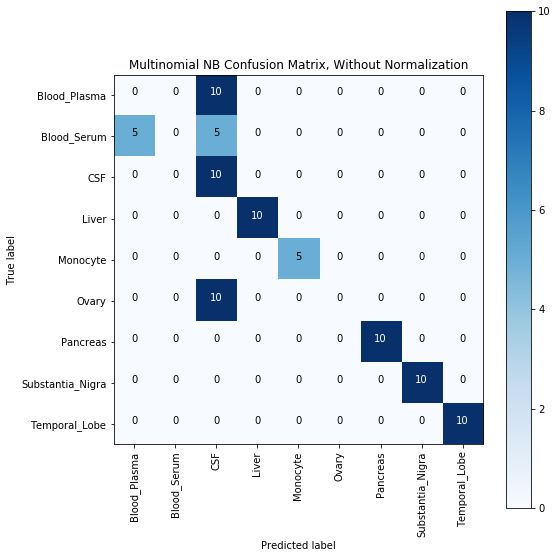

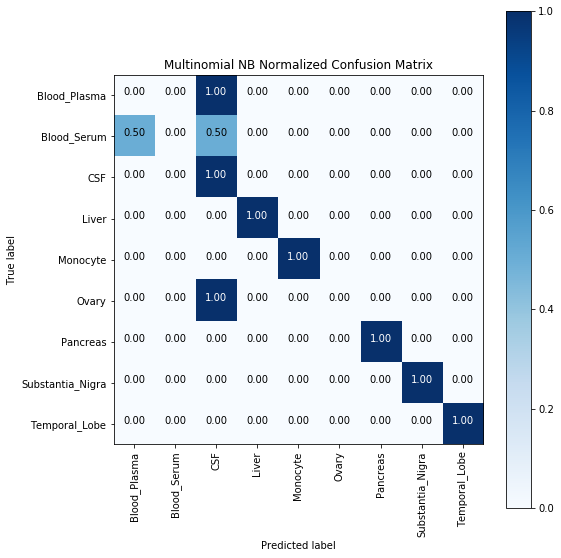

In [25]:
cm_labels = list(set(mnb_pred.tolist() + test_labels))

cu.show_confusion_matrices(test_labels, mnb_pred, cm_labels, 'Multinomial NB ')